In [129]:
#Imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import matplotlib.pyplot as plt
import plotly.express as px
import panel as pn
import json
import hvplot.pandas
import plotly.express as px

In [118]:
# Load .env enviroment variables
load_dotenv()
AlphaVantageKey = os.getenv("ALPHA_VANTAGE_KEY") 

In [107]:
# Set up Panel Plotly extension
pn.extension('plotly')

In [108]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [110]:
#Get stock data
# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes between now and 3 years ago.
start_date = pd.Timestamp("2020-05-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-01-19", tz="America/New_York").isoformat()

# Set the ticker information
tickers = input("Please enter stock ticker\n ")

# Get 3 year's worth of historical price data for Microsoft and Coca-Cola
df_ticker = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Display sample data
df_ticker.iloc[:,4]

Please enter stock ticker
  NVDA


C:\Users\johng\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:18: DeprecatedWarning: get_barset is deprecated as of v1.0.0. Use get_bars instead


time
2020-05-01 00:00:00-04:00     7840411
2020-05-04 00:00:00-04:00    14505166
2020-05-05 00:00:00-04:00     8729950
2020-05-06 00:00:00-04:00    15249165
2020-05-07 00:00:00-04:00    17578346
                               ...   
2022-01-12 00:00:00-05:00    35620987
2022-01-13 00:00:00-05:00    51118368
2022-01-14 00:00:00-05:00    37205105
2022-01-18 00:00:00-05:00    37714537
2022-01-19 00:00:00-05:00    46184928
Name: (NVDA, volume), Length: 434, dtype: int64

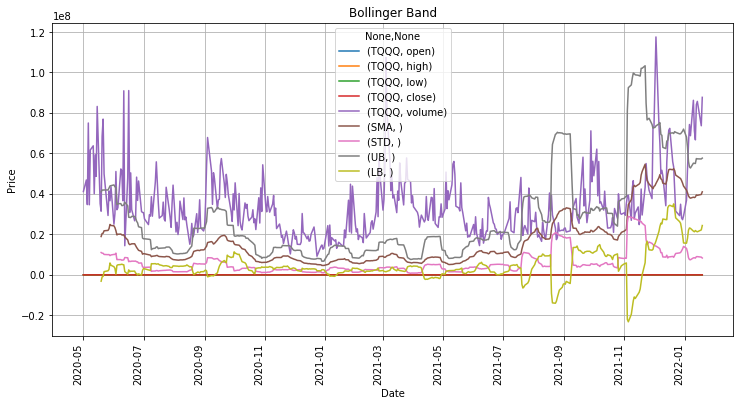

TQQQ                                       \
                             open     high     low     close    volume   
time                                                                     
2022-01-12 00:00:00-05:00  153.91  155.930  149.88  152.6305  66713757   
2022-01-13 00:00:00-05:00   77.13   77.550   70.02   70.6000  84112566   
2022-01-14 00:00:00-05:00   69.09   72.065   69.00   71.9100  85733795   
2022-01-18 00:00:00-05:00   68.50   69.720   66.06   66.6400  73677344   
2022-01-19 00:00:00-05:00   67.31   68.710   64.16   64.3384  87716264   

                                    SMA           STD            UB  \
                                                                      
time                                                                  
2022-01-12 00:00:00-05:00  3.846583e+07  8.284035e+06  5.503390e+07   
2022-01-13 00:00:00-05:00  3.948096e+07  8.990260e+06  5.746148e+07   
2022-01-14 00:00:00-05:00  3.930066e+07  9.012258e+06  5.732518e+07   
2022-01-18 00:00:00-05:00  3.973742e+07  8.765080e+06  5.726758e+07   
2022-01-19 00:00:00-05:00  4.103766e+07  8.327626e+06  5.769291e+07   

                                     LB  
                                         
time                                     
2022-01-12 00:00:00-05:00  2.189776e+07  
2022-01-13 00:00:00-05:00  2.150044e+07  
2022-01-14 00:00:00-05:00  2.127615e+07  
2022-01-18 00:00:00-05:00  2.220726e+07  
2022-01-19 00:00:00-05:00  2.438241e+07

In [111]:
#Calculate Bollinger Bands
#df['SMA']=df['close'].rolling(window=13).mean()
#df['STD']=df['close'].rolling(window=13).std()
df['SMA']=df_ticker.iloc[:,4].rolling(window=13).mean()
df['STD']=df_ticker.iloc[:,4].rolling(window=13).std()

df['UB']=df['SMA']+(df['STD']*2)
df['LB']=df['SMA']-(df['STD']*2)
#cl=['Close', 'SMA', 'UB', 'LB']
df.plot(figsize=(12.2,6.4))
plt.title('Bollinger Band')
plt.ylabel('Price')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()
df.tail()

C:\Users\johng\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  elif X.ndim in [1, 2]:
C:\Users\johng\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  elif X.ndim in [1, 2]:
C:\Users\johng\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if cycler is None:
C:\Users\johng\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support fo

NameError: name 'plt2' is not defined

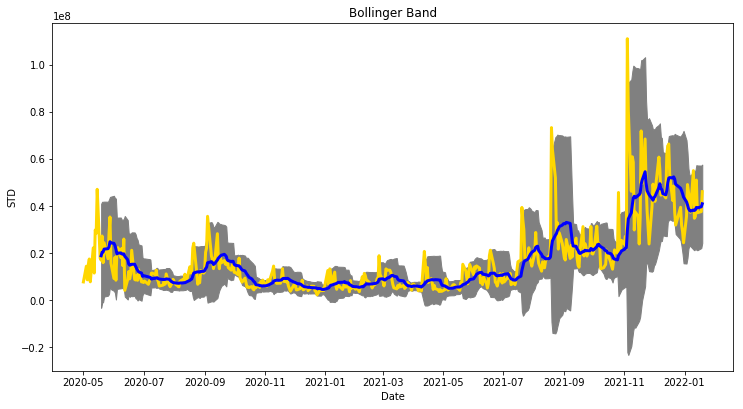

In [113]:
#Ploting bollinger band

fig1=plt.figure(figsize=(12.2,6.4))
ax=fig1.add_subplot(1,1,1)
x_axis=df.index
ax.fill_between(x_axis, df['UB'], df['LB'], color='grey')
ax.plot(x_axis, df_ticker.iloc[:,4], color='gold', lw=3, label='close price')
ax.plot(x_axis, df['SMA'], color='blue', lw=3, label='SMA')
ax.set_title('Bollinger Band')
ax.set_xlabel('Date')
ax.set_ylabel('STD')
plt2.xticks(rotation=90)
ax.legend()
plt2.show()

In [114]:
# Define RSI function

def rsi(df, periods = 14, ema = True):
    """
    Returns a pd.Series with the relative strength index.
    """
    close_delta = df_ticker.iloc[:,4].diff()

    # Make two series: one for lower closes and one for higher closes
    up = close_delta.clip(lower=0)
    down = -1 * close_delta.clip(upper=0)
    
    if ema == True:
	    # Use exponential moving average
        ma_up = up.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
        ma_down = down.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
    else:
        # Use simple moving average
        ma_up = up.rolling(window = periods, adjust=False).mean()
        ma_down = down.rolling(window = periods, adjust=False).mean()
        
    rsi = ma_up / ma_down
    rsi = 100 - (100/(1 + rsi))
    return rsi

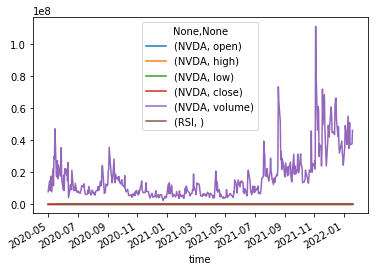

In [115]:
df_ticker['RSI'] = rsi(df_ticker)
df_ticker['RSI'].dropna().head(20)
df_ticker.plot()

In [116]:
plt.show()

In [117]:
#Pull stock metrics from Alphavantage. NOTE: Doesn't appear to work with ETFs and funds, only stocks


# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=OVERVIEW&symbol=NVDA&apikey=' + AlphaVantageKey
r = requests.get(url)
data = r.json()

data

{'Symbol': 'NVDA',
 'AssetType': 'Common Stock',
 'Name': 'NVIDIA Corporation',
 'Description': 'Nvidia Corporation is an American multinational technology company incorporated in Delaware and based in Santa Clara, California. It designs graphics processing units (GPUs) for the gaming and professional markets, as well as system on a chip units (SoCs) for the mobile computing and automotive market.',
 'CIK': '1045810',
 'Exchange': 'NASDAQ',
 'Currency': 'USD',
 'Country': 'USA',
 'Sector': 'MANUFACTURING',
 'Industry': 'SEMICONDUCTORS & RELATED DEVICES',
 'Address': '2701 SAN TOMAS EXPRESSWAY, SANTA CLARA, CA, US',
 'FiscalYearEnd': 'January',
 'LatestQuarter': '2021-10-31',
 'MarketCapitalization': '629030650000',
 'EBITDA': '9759000000',
 'PERatio': '77.84',
 'PEGRatio': '2.427',
 'BookValue': '9.51',
 'DividendPerShare': '0.16',
 'DividendYield': '0.0006',
 'EPS': '3.243',
 'RevenuePerShareTTM': '9.75',
 'ProfitMargin': '0.338',
 'OperatingMarginTTM': '0.354',
 'ReturnOnAssetsTTM': 

In [ ]:
## Need to find a way to display the relevant lines above

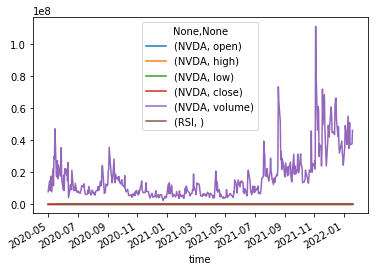

In [128]:
## Plot time trend data
df_ticker.plot()